cmpe58y Final Project MountainCar Q-Learning


Ömer Faruk Özdemir



In [1]:
import gym
import numpy as np
import math
import random
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0")
#Use the pole angle and pole angle speed data
#Position and velocity of the cart is a little side objective, and can be solved by solving pole angle&angle velocity


upperBounds=env.observation_space.high
lowerBounds=env.observation_space.low

featuresDiscreteNo=20
actionNo=3
featureNo=2
#there are 2 features, 3 actions
QMAP=np.zeros(shape=tuple(np.append(np.repeat(featuresDiscreteNo,featureNo),actionNo)))

gama=0.95

#Epsilon starts with 1 and drops to 0.1 with time
def chooseEpsilon(time):
    return 0.99 ** time
#Alpha starts with 1 and drops to 0.1 with time
def chooseAlpha(time):
    return 0.1
# return max(0.1,min(1.0,1.0- math.log10((1+time)/10)))

#Discretize States to [0,featuresDiscreteNo-1]
def discretizeState(state):
    discrete=state%(upperBounds-lowerBounds)
    discrete=discrete/(upperBounds-lowerBounds)*featuresDiscreteNo
    discrete=np.minimum(discrete,np.repeat(featuresDiscreteNo-1,featureNo))
    discrete=discrete.astype(int)
    return discrete

#Choose random action with probabilty epsilon
def chooseAction(epsilon,stateConditions):
    if np.random.random()<epsilon:
        return int(np.random.random()*2)
    else:
        return np.argmax(QMAP[tuple(stateConditions)])

#Update QMAP
def updateQMAP(oldStateConditions,newStateConditions,action,reward,alpha):
    change=alpha*(reward+gama*np.max(QMAP[tuple(newStateConditions)])-QMAP[tuple(oldStateConditions)][action])
    QMAP[tuple(oldStateConditions)][action]+=change

Lets plot times for reaching objective per episode


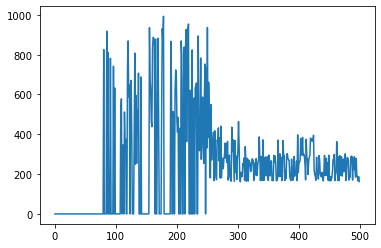

In [2]:
#How many rounds does it take to reach objective position
plotData=np.zeros(500)

accumulatedReward=0
#First 500 episode, mainly for training
for episode in range(500):
    alpha=chooseAlpha(episode)
    epsilon=chooseEpsilon(episode)
    oldObservation=env.reset()
    oldStateConditions=discretizeState(oldObservation)
    finished=False
    for timeStep in range(1000):
        #env.render()
        action=chooseAction(epsilon,oldStateConditions)
        newObservation, reward, done, info = env.step(action)
        #reward=-timeStep
        if done:
        #Punish left position limit harsh
            if newObservation[0]==-1.2:
                reward=-10
            #Reward reaching objective position high, and finish episode
            if newObservation[0]>0.5:
                reward=1000
                finished=True
            #Punish passing round 200
            else:
                reward=-10

        newStateConditions=discretizeState(newObservation)
        updateQMAP(oldStateConditions,newStateConditions,action,reward,alpha)
        oldStateConditions=newStateConditions
        if finished:
            plotData[episode]=timeStep
            break
            
print("Lets plot times for reaching objective per episode")
plt.plot(plotData)
plt.show()

In [3]:

numberOfSuccess=0
averageReachingTime=0
accumulatedReward=0
print("Lastly a visualization for 15 times")
#For rendering the power of the bot in 1k tick
for time in range(1001,1016):
	roundSurvival=0
	alpha=chooseAlpha(time)
	epsilon=chooseEpsilon(time)
	oldObservation=env.reset()
	oldStateConditions=discretizeState(oldObservation)
    
	for survival in range(1000):		
		env.render()
		action=chooseAction(epsilon,oldStateConditions)
		newObservation, reward, done, info = env.step(action)
		#Objective of position is >0.5
		accumulatedReward+=reward
		roundSurvival+=reward
		newStateConditions=discretizeState(newObservation)
		oldStateConditions=newStateConditions
        
		if done and newObservation[0]>0.5:
			print("Reached objective in timestep",survival)
			env.render()
			env.reset()
			numberOfSuccess+=1
			averageReachingTime+=survival
			break
print("Reached objective at this ratio in 1000 timesteps: %",numberOfSuccess/15*100)
print("Average reaching time:",averageReachingTime/numberOfSuccess)
env.close()

Lastly a visualization for 15 times
Reached objective in timestep 284
Reached objective in timestep 283
Reached objective in timestep 169
Reached objective in timestep 182
Reached objective in timestep 168
Reached objective in timestep 204
Reached objective in timestep 169
Reached objective in timestep 288
Reached objective in timestep 166
Reached objective in timestep 226
Reached objective in timestep 300
Reached objective in timestep 223
Reached objective in timestep 222
Reached objective in timestep 190
Reached objective in timestep 198
Reached objective at this ratio in 1000 timesteps: % 100.0
Average reaching time: 218.13333333333333


# ----------------------------------------------------------------------
This model takes -1 rewards for every timestep that it havent reach objective yet.

I added +1000 reward for reaching objective, to reward path to objective.

When I trained it like this it was abusing left wall quite a lot, it was hitting it, trespassing the boundaries.

Later I added -1000 reward as punishment for touching left wall.

However this caused for model to reach objective quite late. Because it was trying to avoid getting closer to left wall.

Then I reduced this punishment to -10.

Also I added -10 reward for passing round 200, so that it reaches the objective faster. It was reaching objective 200 timesteps in average.

Later for increasing this speed I changed default reward to "reward=-timeStep", this decreased average time for finish to ~170. But this was not stable and was causing low speed sometimes, so I reverted this.